### FEATURE ENGINEERING, MODEL SELECTION IN LINEAR REGRESSION

#### REGULARIZATION

##### There is the case that when you predict the model, performance in the training set is good but the model performs on the test set very badly, maybe it is because of overfitting. To avoid overfitting to improve the performance on test set to help with the regularization, you use the Ridge or Lasso Regression to do that. 
##### Another case that you need to do regularization is that when you have so many features while there is not so many data points in your dataset. In this case, Linear Regression will fail to come up with the model. So Ridge or Lasso Regression will be applied. 
##### To know exactly when you have to choose Ridge or Lasso, lets do some comparision between two models and then we can understand when we you them. 

#### AGENDA
- Perform basic EDA
- Scale data and apply Linaer, Ridge, Lasso Regression with Regularization
- Compare the R^2 score to determine which of the above regression methods gives the highest score
- Compute Root mean squared error (RMSE) which inturn gives a better score than R^2
- Finally use a scatter plot to graphically depict the correlation between actual and predicted mpg values

### 1. IMPORT PACKAGES AND DATASET

In [1]:
#Import numerical libraries
import numpy as np
import pandas as pd

#Import graphically plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import Linear Regression ML Libraries
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score

/Volumes/Data/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Volumes/Data/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Volumes/Data/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Volumes/Data/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [21]:
data = pd.read_csv("OneDrive/Machine Learning/Dataset/car-mpg .csv")

In [22]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [23]:
## Drop "Car_name" columns
data = data.drop(["car_name"], axis=1)

In [24]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [25]:
## Replace Origin 1,2,3 into "America", "Europe", "Asia" and then get dummies
data["origin"] = data["origin"].replace({1:"america", 2:"europe", 3:"aisa"})
data.head()
data = pd.get_dummies(data,columns=["origin"])

In [28]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_aisa,origin_america,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,0,1,0
1,15.0,8,350.0,165,3693,11.5,70,0,0,1,0
2,18.0,8,318.0,150,3436,11.0,70,0,0,1,0
3,16.0,8,304.0,150,3433,12.0,70,0,0,1,0
4,17.0,8,302.0,140,3449,10.5,70,0,0,1,0


In [36]:
## Replace "?" with NAN value
## Replace NAN with median
data = data.replace("?", np.nan)
data = data.apply(lambda x: x.fillna(x.median()), axis=0)

### MODEL BUILDING

In [38]:
X = data.drop(["mpg"], axis = 1) ## independent variables

In [42]:
y = data[["mpg"]] ## Dependent variable

In [44]:
## Scaling data

X_s = preprocessing.scale(X)
X_s = pd.DataFrame(X_s, columns= X.columns)
X_s.head()

/Volumes/Data/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


,cyl,disp,hp,wt,acc,yr,car_type,origin_aisa,origin_america,origin_europe
0,1.498191,1.090604,0.676581,0.630870,-1.295498,-1.627426,-1.062235,-0.497643,0.773559,-0.461968
1,1.498191,1.503514,1.555508,0.854333,-1.477038,-1.627426,-1.062235,-0.497643,0.773559,-0.461968
2,1.498191,1.196232,1.178825,0.550470,-1.658577,-1.627426,-1.062235,-0.497643,0.773559,-0.461968
3,1.498191,1.061796,1.178825,0.546923,-1.295498,-1.627426,-1.062235,-0.497643,0.773559,-0.461968
4,1.498191,1.042591,0.927703,0.565841,-1.840117,-1.627426,-1.062235,-0.497643,0.773559,-0.461968


In [45]:
y_s = preprocessing.scale(y)
y_s = pd.DataFrame(y_s, columns=y.columns)
y_s.head()

,mpg
0,-0.706439
1,-1.090751
2,-0.706439
3,-0.962647
4,-0.834543


In [71]:
## Split into train, test set
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state = 1)
X_train.shape

(278, 10)

### SIMPLE LINEAR MODEL

In [47]:
regression_model = LinearRegression().fit(X_train,y_train)

In [55]:
for inx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][inx]))

The coefficient for cyl is 0.2971476448395707
The coefficient for disp is 0.31335284107836026
The coefficient for hp is -0.14490491072404482
The coefficient for wt is -0.7609051716110684
The coefficient for acc is 0.03939636195489257
The coefficient for yr is 0.381155277460917
The coefficient for car_type is 0.3581022798243332
The coefficient for origin_aisa is 0.04424019802301043
The coefficient for origin_america is -0.07516107889297023
The coefficient for origin_europe is 0.049194257993701675


In [58]:
intercept = regression_model.intercept_[0]
print("The intercept is {}".format(intercept))

The intercept is 0.0182878267749276


In [60]:
### REGULARIZED RIDGE REGRESSION
#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff

In [144]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)
print("Ridge model coef {}".format(ridge_model.coef_))

Ridge model coef [[ 0.29590618  0.30924146 -0.14512188 -0.75715544  0.03868181  0.38074708
   0.35687063  0.04422007 -0.07499996  0.04901054]]


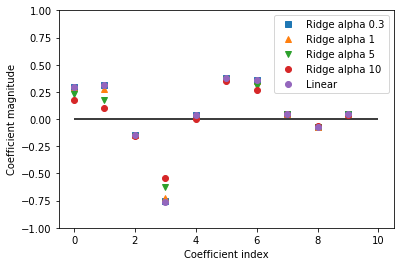

In [145]:
## Ridge model with different alpha (lambda penalties)
ridge_model1 = Ridge(alpha=1).fit(X_train,y_train)
ridge_model5 = Ridge(alpha=5).fit(X_train,y_train)
ridge_model10 = Ridge(alpha = 10).fit(X_train,y_train)

plt.plot(ridge_model.coef_[0], "s", label="Ridge alpha 0.3")
plt.plot(ridge_model1.coef_[0], "^", label="Ridge alpha 1")
plt.plot(ridge_model5.coef_[0], "v", label="Ridge alpha 5")
plt.plot(ridge_model10.coef_[0], "o", label="Ridge alpha 10")
plt.plot(regression_model.coef_[0], "o", label="Linear")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(regression_model.coef_[0]))
plt.ylim(-1, 1)
plt.legend()

In [148]:
print("LINEAR REGRESSION")
print(regression_model.score(X_train,y_train))
print(regression_model.score(X_test,y_test))
print("***********************")
print("RIDGE SCORE ALPHA 0.1")
print(ridge_model.score(X_train,y_train))
print(ridge_model.score(X_test,y_test))
print("***********************")
print("RIDGE SCORE ALPHA 1")
print(ridge_model1.score(X_train,y_train))
print(ridge_model1.score(X_test,y_test))
print("***********************")
print("RIDGE SCORE ALPHA 5")
print(ridge_model5.score(X_train,y_train))
print(ridge_model5.score(X_test,y_test))
print("***********************")
print("RIDGE SCORE ALPHA 10")
print(ridge_model10.score(X_train,y_train))
print(ridge_model10.score(X_test,y_test))

LINEAR REGRESSION
0.8319889089854278
0.856526076599895
***********************
RIDGE SCORE ALPHA 0.1
0.8319871084630799
0.8567285694657272
***********************
RIDGE SCORE ALPHA 1
0.8318286490992783
0.8582779981284716
***********************
RIDGE SCORE ALPHA 5
0.8293697445213164
0.861510553999631
***********************
RIDGE SCORE ALPHA 10
0.8250302540429476
0.8619292268214808


In [149]:
## Ridge regression performs better than linear regression, especailly when ALPHA is higher
## We can choose the model Ridge Regression with Alpha 10

In [120]:
### REGULARIZED LASSO REGRESSION

In [152]:
lasso_model = Lasso(alpha = 0.01).fit(X_train, y_train)
print("Lasso model coef {}".format(lasso_model.coef_))

Lasso model coef [ 0.16992124  0.03998402 -0.0825551  -0.58830813  0.          0.35801137
  0.23485101  0.         -0.08983588  0.        ]


In [117]:
### We can see there are some coeffcients that become zero.

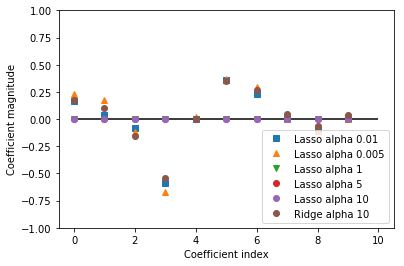

In [158]:
lasso_model005 = Lasso(alpha = 0.005).fit(X_train,y_train)
lasso_model1 = Lasso(alpha = 1).fit(X_train,y_train)
lasso_model5 = Lasso(alpha = 5).fit(X_train,y_train)
lasso_model10 = Lasso(alpha = 10).fit(X_train,y_train)

plt.plot(lasso_model.coef_, "s", label="Lasso alpha 0.01")
plt.plot(lasso_model005.coef_, "^", label="Lasso alpha 0.005")
plt.plot(lasso_model1.coef_, "v", label="Lasso alpha 1")
plt.plot(lasso_model5.coef_, "o", label="Lasso alpha 5")
plt.plot(lasso_model10.coef_, "o", label="Lasso alpha 10")
plt.plot(ridge_model10.coef_[0], "o", label="Ridge alpha 10")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(regression_model.coef_[0]))
plt.ylim(-1, 1)
plt.legend()

In [160]:
print("RIDGE SCORE ALPHA 10")
print(ridge_model10.score(X_train,y_train))
print(ridge_model10.score(X_test,y_test))
print("***********************")
print("LASSO SCORE ALPHA 0.01")
print(lasso_model.score(X_train,y_train))
print(lasso_model.score(X_test, y_test))
print("***********************")
print("LASSO SCORE ALPHA 0.005")
print(lasso_model005.score(X_train,y_train))
print(lasso_model005.score(X_test, y_test))
print("***********************")
print("LASSO SCORE ALPHA 1")
print(lasso_model1.score(X_train,y_train))
print(lasso_model1.score(X_test, y_test))
print("***********************")
print("LASSO SCORE ALPHA 5")
print(lasso_model5.score(X_train,y_train))
print(lasso_model5.score(X_test, y_test))
print("***********************")
print("LASSO SCORE ALPHA 10")
print(lasso_model10.score(X_train,y_train))
print(lasso_model10.score(X_test, y_test))


RIDGE SCORE ALPHA 10
0.8250302540429476
0.8619292268214808
***********************
LASSO SCORE ALPHA 0.01
0.8235080251458016
0.8606643853503911
***********************
LASSO SCORE ALPHA 0.005
0.8298547571758096
0.8611885695995548
***********************
LASSO SCORE ALPHA 1
0.0
-0.00139626919395619
***********************
LASSO SCORE ALPHA 5
0.0
-0.00139626919395619
***********************
LASSO SCORE ALPHA 10
0.0
-0.00139626919395619


#### As we can see from the chart and the R^2 score for LASSO REGRESSION, the Lasso Regression with ALPHA 0.005 performs best. 

We can conclude that both RIDGE and LASSO REGRESSION performs very well on this data, however RIDGE REGRESSION alpha 10 gives a better score. 

In [163]:
for inx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {:.2f}".format(col_name, ridge_model10.coef_[0][inx]))

The coefficient for cyl is 0.17
The coefficient for disp is 0.11
The coefficient for hp is -0.15
The coefficient for wt is -0.54
The coefficient for acc is 0.00
The coefficient for yr is 0.35
The coefficient for car_type is 0.27
The coefficient for origin_aisa is 0.05
The coefficient for origin_america is -0.07
The coefficient for origin_europe is 0.04


In [165]:
print("The intercept is {:.2f}".format(ridge_model10.intercept_[0]))

The intercept is 0.02


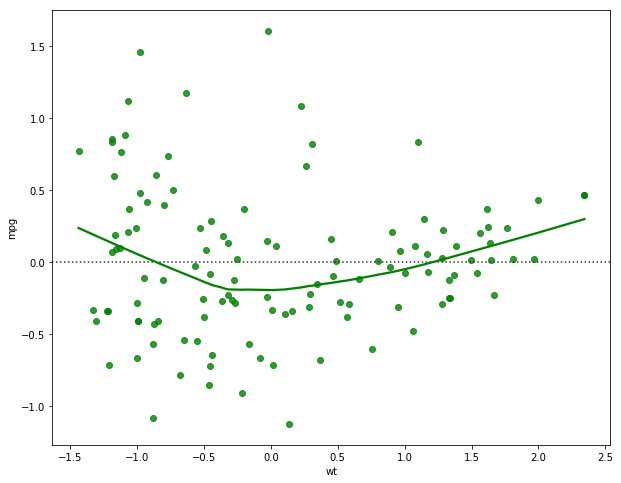

In [168]:
fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['wt'], y= y_test['mpg'], color='green', lowess=True )

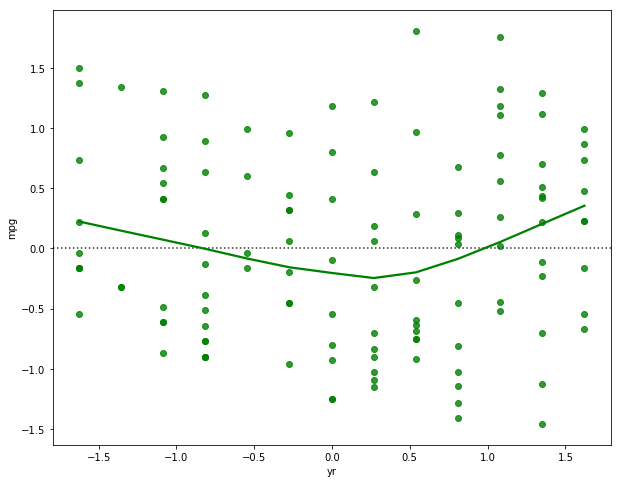

In [169]:
fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['yr'], y= y_test['mpg'], color='green', lowess=True )

In [170]:
y_pred = regression_model.predict(X_test)

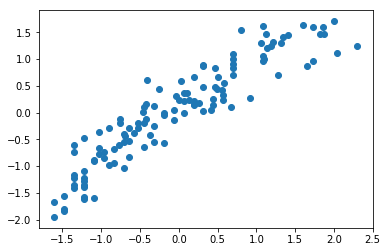

In [171]:
plt.scatter(y_test['mpg'], y_pred)